#**<center>Predicting Customer Churn of a Telecommunication Company using Logistic Regression</center>**

<center>A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.</center>

###**Importing Library**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Downloading the Dataset from IBM Object Storage**

In [29]:
!wget -O CustomerChurn.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-07-11 08:13:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘CustomerChurn.csv’

CustomerChurn.csv   100%[===================>]  35.30K  --.-KB/s    in 0.02s   

2020-07-11 08:13:20 (1.40 MB/s) - ‘CustomerChurn.csv’ saved [36144/36144]



###**Reading & Exploring the Data**

In [30]:
df = pd.read_csv('CustomerChurn.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [31]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,13.240000,15.783250,14.358750,12.2170,577.770750,507.007500,650.663750,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,15.643842,19.557103,14.781269,21.6326,746.608653,820.027858,941.470689,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,0.000000,0.000000,0.000000,0.0000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,0.000000,0.000000,0.000000,0.0000,79.337500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,0.000000,0.000000,12.500000,0.0000,289.525000,0.000000,342.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,24.750000,33.012500,20.750000,23.4625,806.762500,724.162500,921.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,68.500000,63.250000,109.250000,109.7000,4333.000000,4938.600000,7515.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [32]:
df['churn'].value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

###**Data Pre-Processing**

We will be using `'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn'` as the features set to build our logistic regression model.

In [33]:
from sklearn.preprocessing import StandardScaler

X_data = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].values
y_data = df['churn'].astype(int).values

scale = StandardScaler()
X_data = scale.fit(X_data).transform(X_data)

###**Splitting Train & Test Set**

In [34]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size=0.2, random_state=4)
print("Size of the Train Set: ", train_X.shape[0])
print("Size of the Test Set: ", test_X.shape[0])

Size of the Train Set:  160
Size of the Test Set:  40


###**Training The Model**

In [35]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=0.01, solver='liblinear')
classifier.fit(train_X, train_y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predicted_y = classifier.predict(test_X)
predicted_y_prob = classifier.predict_proba(test_X)
print("Predicted Value: ", predicted_y)
print("Predicted Probability: ", predicted_y_prob)

Predicted Value:  [0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0]
Predicted Probability:  [[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]
 [0.55386646 0.44613354]
 [0.52237207 0.47762793]
 [0.60514349 0.39485651]
 [0.41069572 0.58930428]
 [0.6333873  0.3666127 ]
 [0.58068791 0.41931209]
 [0.62768628 0.37231372]
 [0.47559883 0.52440117]
 [0.4267593  0.5732407 ]
 [0.66172417 0.33827583]
 [0.55092315 0.44907685]
 [0.51749946 0.48250054]
 [0.485743   0.514257  ]
 [0.49011451 0.50988549]
 [0.52423349 0.47576651]
 [0.61619519 0.38380481]
 [0.52696302 0.47303698]
 [0.63957168 0.36042832]
 [0.52205164 0.47794836]
 [0.50572852 0.49427148]
 [0.70706202 0.29293798]
 [0.55266286 0.44733714]
 [0.52271594 0.47728406]
 [0.51638863 0.48361137]
 [0.71331391 0.28668609]
 [0.67862111 0.32137889]
 [0.50896403 0.49103597]
 [0.42348082 0.57651918]
 [0.71495838 0.28504162]
 [0.59711064 0.40288936]


###**Evaluation of The Model**

In [60]:
from sklearn.metrics import jaccard_score, confusion_matrix, classification_report, log_loss

print("Jaccard Score: ", jaccard_score(test_y, predicted_y))
print("Log Loss: ", log_loss(test_y, predicted_y_prob))
print(classification_report(test_y, predicted_y))
cm = confusion_matrix(test_y, predicted_y, labels=[1,0])

Jaccard Score:  0.375
Log Loss:  0.6017092478101185
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



###**Visualizing the Confusion Matrix**

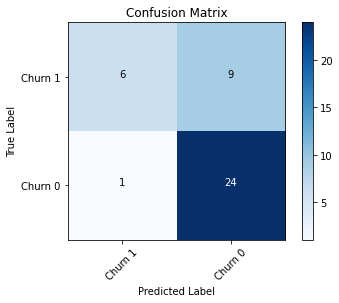

In [57]:
import itertools


classes = ['Churn 1', 'Churn 0']
tick_marks = np.arange(len(classes))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for x_cord, y_cord in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(y_cord, x_cord, cm[x_cord, y_cord], horizontalalignment='center', color='white' if cm[x_cord, y_cord] > cm.max()/2 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

###**Let's Try to Build our Model with Different Solver**
Let's try to build our model with __sag__ solver and see if the model improves

In [74]:
new_classifier = LogisticRegression(C=0.01, solver='sag')
new_classifier.fit(train_X, train_y)
new_predicted_y = new_classifier.predict(test_X)
new_predicted_y_prob = new_classifier.predict_proba(test_X)

In [75]:
print("LoG Loss: ", log_loss(test_y, new_predicted_y_prob))

LoG Loss:  0.6114140200408057


##**<center>Thank You for Your Patience</center>**